In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample  # For bootstrap sampling

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define sample size as 20% of the training data length
sample_size = int(0.2 * len(X_train))

# List to store trained models
list_models = []

# Number of decision trees
no_classifiers = 10

for i in range(no_classifiers):
    X_sample, y_sample = resample(X_train, y_train, n_samples=sample_size, random_state=i)
    clf = DecisionTreeClassifier(random_state=i)
    clf.fit(X_sample, y_sample)
    list_models.append(clf)

print(f"Trained {len(list_models)} decision tree models.")

print('--------------------------------------------------------------------------------')

'''Each model in ‘list_models’ makes prediction on X_test
Compute final prediction using majority voting
Show the final predictions of X_test '''

from scipy.stats import mode
all_predictions = np.array([model.predict(X_test) for model in list_models])
final_predictions = mode(all_predictions, axis=0).mode[0]

# Step 3: Show the final predictions of X_test
print("Final Predictions for X_test:")
print(final_predictions)


Trained 10 decision tree models.
--------------------------------------------------------------------------------
Final Predictions for X_test:
1


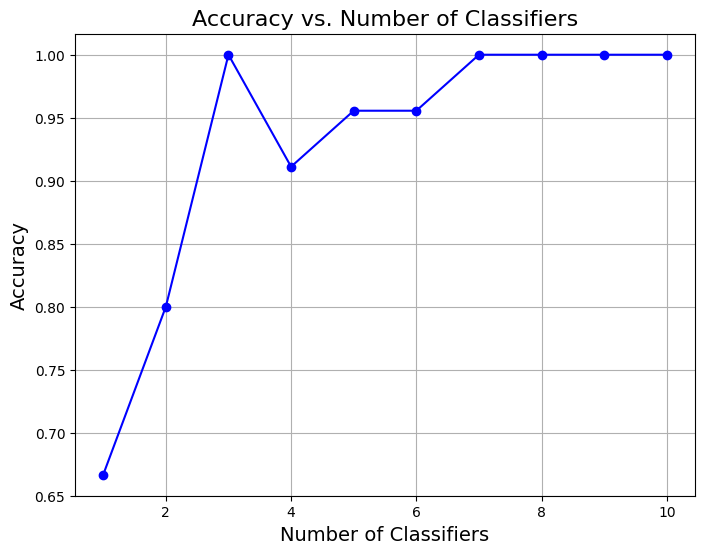

In [8]:
# 2) [4 pts] Plot a graph accuracy vs number of classifiers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import mode

accuracies = []

for i in range(1, len(list_models) + 1):
    subset_predictions = np.array([model.predict(X_test) for model in list_models[:i]])
    majority_vote = mode(subset_predictions, axis=0)
    final_predictions = majority_vote.mode.flatten()
    accuracy = accuracy_score(y_test, final_predictions)
    accuracies.append(accuracy)

# Step 2: Plot accuracy vs number of classifiers
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(list_models) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Classifiers', fontsize=16)
plt.xlabel('Number of Classifiers', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()



In [12]:
# 3) [bonus 5 pts] Instead of decision tree, use another classifier and repeat q. 1)-2).

import numpy as np
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

list_models = []
no_classifiers = 10

for i in range(no_classifiers):
    X_sample, y_sample = resample(X_train, y_train, n_samples=int(0.2 * len(X_train)), random_state=i)
    clf = RandomForestClassifier(n_estimators=10, random_state=i)
    clf.fit(X_sample, y_sample)
    list_models.append(clf)

all_predictions = np.array([model.predict(X_test) for model in list_models])

final_predictions = mode(all_predictions, axis=0).mode[0]  # Extract the majority vote for each test sample

# Step 3: Show the final predictions of X_test
print("Final Predictions for X_test using RandomForest:")
print(final_predictions)




Final Predictions for X_test using RandomForest:
1
